#**The Perceptron** 

For *'Medium'* Blog Series for Deep Learning.

***Note:*** This Colaboratory notebook is for understanding only.


# **The Perceptron** - A single artificial neuron.

In [1]:
# Requirements
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def load_data():
    """
    Loads the iris dataset which has following attributes:
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    Dataset information : https://archive.ics.uci.edu/ml/datasets/Iris
    Attribute Information:
        0 - sepal length in cm
        1 - sepal width in cm
        2 - petal length in cm
        3 - petal width in cm
        4 - Iris class: [Setosa, Versicolour, Virginica]
    ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
    """
    iris_data_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
    data = pd.read_csv(iris_data_url, header=None)
    # print(data)

    # Make class into binary. 
    # Classes = ['setosa', 'Versisolor']
    data = data[:100]  # [1-50] = Setosa, [51-100] = Versicolor 
    data[4] = np.where(data.iloc[:, -1]=='Iris-setosa', 0, 1) # Encode the lasses
    data = np.asmatrix(data, dtype='float64')
    # print(data)
    
    return data

data = load_data()

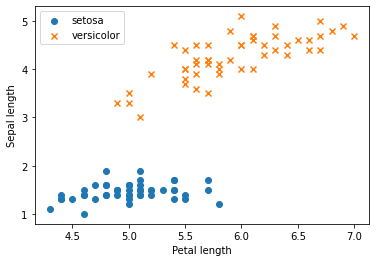

In [3]:
# Data visualization
plt.scatter(np.array(data[:50, 0]), np.array(data[:50, 2]), marker='o', label='setosa')
plt.scatter(np.array(data[50:, 0]), np.array(data[50:, 2]), marker='x', label='versicolor')
plt.xlabel('Petal length')
plt.ylabel('Sepal length')
plt.legend()
plt.show()

# [Note] : Dataset is clearly seperated with linear line

In [4]:
def perceptron(data, iteration):
    # Prepare features and labels
    features = data[:, :-1]
    labels = data[:, -1]

    # Initialize weights with zeros
    w = np.zeros(shape=(1, features.shape[1]+1))
    # w = np.random.rand(1, features.shape[1]+1)

    # Misclassification
    _misclassified = []

    for epoch in range(iteration):
        misclassified = 0
        for x, label in zip(features, labels):
            # Forward pass
            x = np.insert(x, 0, 1) 
            y = np.dot(w, x.transpose())  # Calculates weighted sum
            target = 1.0 if (y > 0) else 0.0  # Checks the correct classification

            delta = (label.item(0, 0) - target)  # for updating weights

            if delta: # Misclassified
                misclassified += 1
                w += delta * x  # Updates weights

        _misclassified.append(misclassified)  

    return (w, _misclassified)

In [5]:
iteration = 10
w, _misclassified = perceptron(data, iteration) 

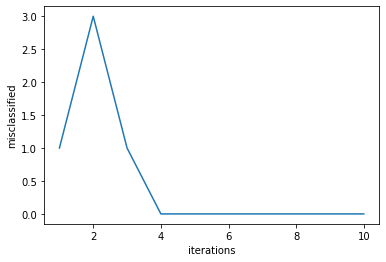

In [6]:
epochs = np.arange(1, iteration+1)
plt.plot(epochs, _misclassified)
plt.xlabel('iterations')
plt.ylabel('misclassified')
plt.show()